Finance Project

This project is about to figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. 
Set each bank to be a seperate dataframe, with the variable name for that bank being its ticker symbol. This will invole a few steps:

1. Use dataframe to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
3. Figure out how to use datareader to grab info on the stock.

In [60]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [61]:
import pandas as pd

In [62]:
df = pd.read_pickle('all_banks')

In [63]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [64]:
# BAC = data.DataReader("BAC", 'yahoo', start, end)
# C = data.DataReader("C", 'yahoo', start, end)
# GS = data.DataReader("GS", 'yahoo', start, end)
# JPM = data.DataReader("JPM", 'yahoo', start, end)
# MS = data.DataReader("MS", 'yahoo', start, end)
# WFC = data.DataReader("WFC", 'yahoo', start, end)

In [65]:
import yfinance as yf
import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2025, 1, 1)

BAC = yf.download("BAC", start=start, end=end)
print(BAC.head())


/var/folders/5c/qq0xxrwj4t52gws0b9nfcmv40000gn/T/ipykernel_16350/1531319994.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  BAC = yf.download("BAC", start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker            BAC        BAC        BAC        BAC        BAC
Date                                                             
2010-01-04  12.232428  12.279206  11.788038  11.881593  180845200
2010-01-05  12.630037  12.637832  12.240221  12.271406  209521300
2010-01-06  12.778168  12.895114  12.497501  12.637834  205257900
2010-01-07  13.199173  13.401878  12.871727  13.004265  320868400
2010-01-08  13.082226  13.331708  12.965280  13.238151  220104700


In [66]:
print(BAC.info())       # Check column types, number of rows



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 to 2024-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, BAC)   3774 non-null   float64
 1   (High, BAC)    3774 non-null   float64
 2   (Low, BAC)     3774 non-null   float64
 3   (Open, BAC)    3774 non-null   float64
 4   (Volume, BAC)  3774 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB
None


In [67]:
print(BAC.describe())   # Summary statistics

Price         Close         High          Low         Open        Volume
Ticker          BAC          BAC          BAC          BAC           BAC
count   3774.000000  3774.000000  3774.000000  3774.000000  3.774000e+03
mean      20.398084    20.623899    20.174831    20.402333  9.648612e+07
std       10.506422    10.608009    10.404080    10.503058  7.726713e+07
min        3.920610     4.101319     3.865612     4.014893  1.205440e+07
25%       11.600253    11.727964    11.487410    11.605094  4.730105e+07
50%       19.606884    19.800810    19.366569    19.558657  7.034525e+07
75%       27.550811    27.836289    27.289621    27.564294  1.184303e+08
max       46.671665    46.974535    46.554425    46.720515  8.596434e+08


In [68]:
print(BAC.isna().sum())


Price   Ticker
Close   BAC       0
High    BAC       0
Low     BAC       0
Open    BAC       0
Volume  BAC       0
dtype: int64


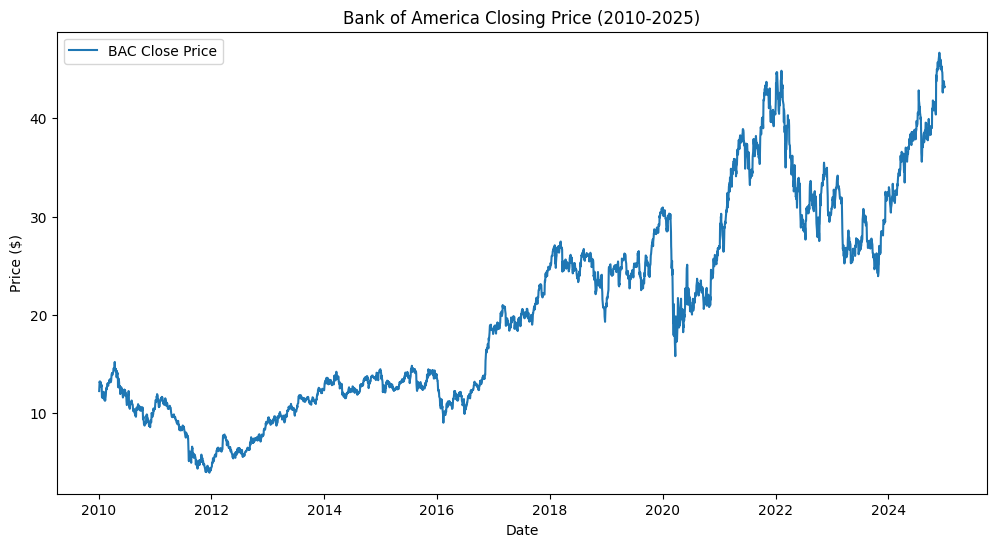

In [69]:
# Visualize closing price
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(BAC['Close'], label='BAC Close Price')
plt.title('Bank of America Closing Price (2010-2025)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


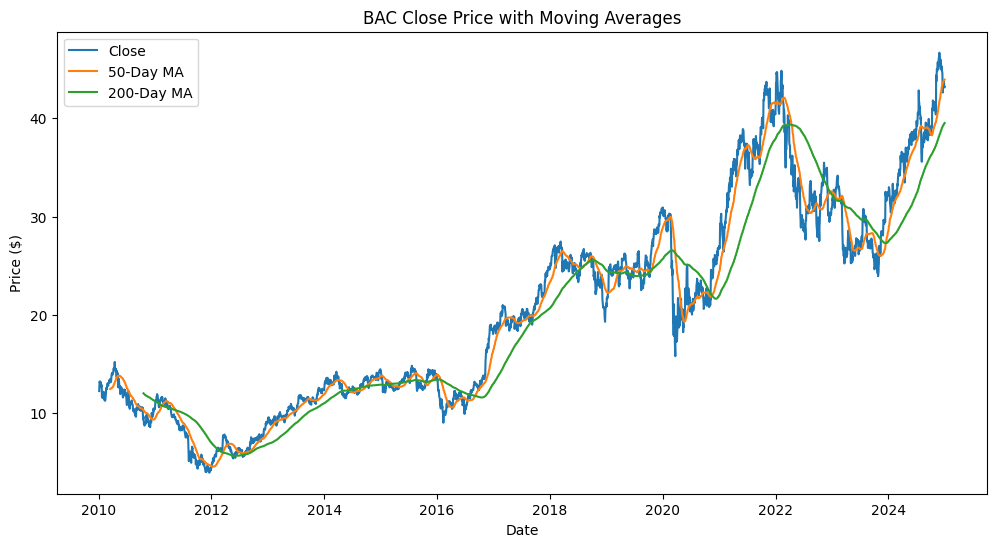

In [70]:
# Plot moving averages, to smooth stock price trends:
BAC['MA50'] = BAC['Close'].rolling(50).mean()   # 50-day MA
BAC['MA200'] = BAC['Close'].rolling(200).mean() # 200-day MA

plt.figure(figsize=(12,6))
plt.plot(BAC['Close'], label='Close')
plt.plot(BAC['MA50'], label='50-Day MA')
plt.plot(BAC['MA200'], label='200-Day MA')
plt.title('BAC Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


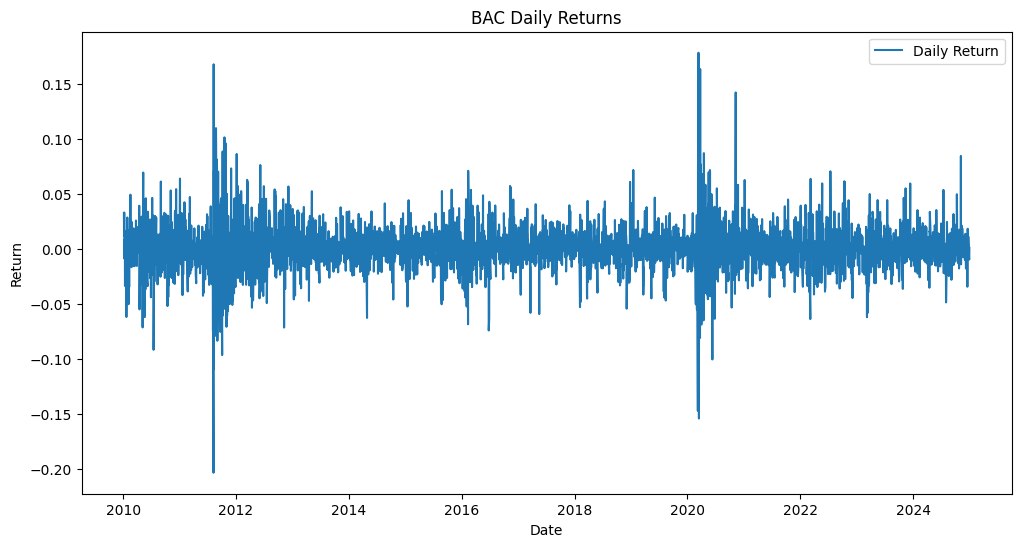

In [71]:
# Plot returns
# To see daily percentage change:
BAC['Return'] = BAC['Close'].pct_change()

plt.figure(figsize=(12,6))
plt.plot(BAC['Return'], label='Daily Return')
plt.title('BAC Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()


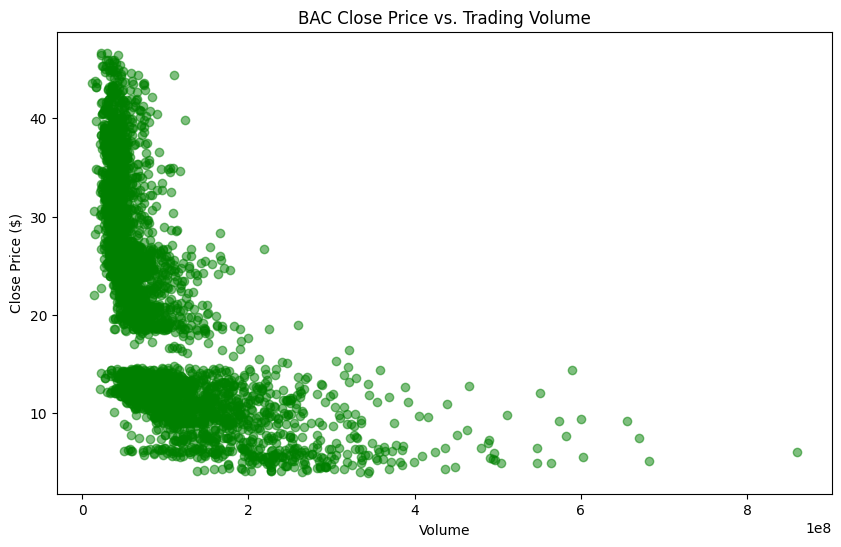

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(BAC['Volume'], BAC['Close'], alpha=0.5, color='green')
plt.title('BAC Close Price vs. Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price ($)')
plt.show()
